## Complete Case Analysis


- Complete-case analysis (CCA) is also called **"list-wise deletion"** of cases, 
- it involves **discarding** observations where values in **any** of the variables are missing. 
- It literally means analysing only those observations for which there is information in **all** of the variables in the dataset. 
- CCA can be applied to both categorical and numerical variables.



### Assumptions

- CCA works well when the data are missing completely at random (MCAR).  
    - When data is MCAR, excluding observations with missing information is in essence the same as randomly excluding some observations from the dataset. Therefore the dataset after CCA is a fair representation of the original dataset. 


### Advantages

- Easy to implement since no manipulation is required
- Does not change variable distribution (if data is MCAR, then the distribution of the variables of the reduced dataset should match the distribution in the original dataset)

### Disadvantages

- It can exclude a large fraction of the original dataset (if missing data is abundant)
- Excluded observations could be informative for the analysis (if data is not missing at random)
- CCA will create a biased dataset if the complete cases differ from the original data (e.g., when missing information is in fact MAR or NMAR and not missing at random).
- When using our models in production, the model will not know how to handle missing data

### When to use CCA

- Data is missing completely at random
- No more than 5% of the total dataset contains missing data

In practice, CCA may be an acceptable method when the amount of missing information is small. Unfortunately, there is no rule of thumb to determine how much missing data is small or negligible. However, as general guidance, **if the total amount of missing data is ~5% of the original dataset or less, CCA is a viable option.**

In many real life datasets, the amount of missing data is never small, and therefore CCA is typically never an option.

### CCA and models in production

When using CCA, we remove all observations that contain missing information. However, the data that we want to score with our model, may indeed contain missing information. **This will pose a problem when using our model in live systems, or as we call it, when putting or models into production: when an observation contains missing data, the model will not be able to handle it.** 

In order to avoid this problem, when putting models into production we need to do 1 of 2 things: either we do not score observations with missing data, or we replace the missing values by another number. 

### Steps to perform CCA
1. Find all the columns with missing values from data frame (**data**)
2. Eliminate all the columns in which missing values >= 5% (Since doing CCA on them will result in loss of information)
3. Create new dataframe (**data_cca**) from all the columns where missing observations <5% after dropping na values.
4. Find the information preserved after cca : len(data_cca)/len(data)
5. Check whether it is safe to apply CCA by verifying whether missing data was MCAR using following ways:
    - For numeric variables, probability distribution or histogram before and after CCA should be almost same
    - For categorical variables, frequency of categories before and after CCA should be almost same


In [2]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#To show all columns of a dataframe
#pd.set_opton('display.max_columns', None)

AttributeError: module 'pandas' has no attribute 'set_opton'

In [5]:
#Import the dataset
data = pd.read_csv('../dataset/house-prices-advanced-regression-techniques/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
for var in data.columns:
    data.var.isnull()

AttributeError: 'function' object has no attribute 'isnull'

In [9]:
#Find the columns with missing observations
cols_with_na = [var for var in data.columns if data[var].isnull().mean() > 0]
cols_with_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [13]:
#Check the datatype of columns with missing observations
data[cols_with_na].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

From the above we can observe that there are both kinds of missing variables numerical (i.e float) and categorical (i.e object)

In [14]:
#Check the values of misisng observations columns
data[cols_with_na].head()

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN


In [20]:
#Calculate the percentage of observations missing in each of the above column
data_na = data[cols_with_na].isnull().mean()
data_na = pd.DataFrame(data_na.reset_index())
data_na.columns = ['missing_column', 'na_percentage']

#Sort the data_na accordinf to na_percentage
data_na.sort_values(by='na_percentage', ascending=False, inplace=True)
data_na

,missing_column,na_percentage
16,PoolQC,0.995205
18,MiscFeature,0.963014
1,Alley,0.937671
17,Fence,0.807534
10,FireplaceQu,0.472603
0,LotFrontage,0.177397
11,GarageType,0.055479
12,GarageYrBlt,0.055479
13,GarageFinish,0.055479
14,GarageQual,0.055479


From the above analysis we can see that top 11 columns have missing values > 5%, which suggests that we should not use CCA as doing so will result in information loss.

However, we can apply CCA to all the other columns.

In [21]:
#Thus we will discard all the observations in a column where na_percentage <5%

cols_cca = [var for var in data.columns if data[var].isnull().mean() < 0.05]
cols_cca

['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCond

In [22]:
#Check how much information will be lost of drop na values 
len(data[cols_cca].dropna())/ len(data)

0.9671232876712329

In [23]:
data_cca = data[cols_cca].dropna()
data.shape, data_cca.shape

((1460, 81), (1412, 70))

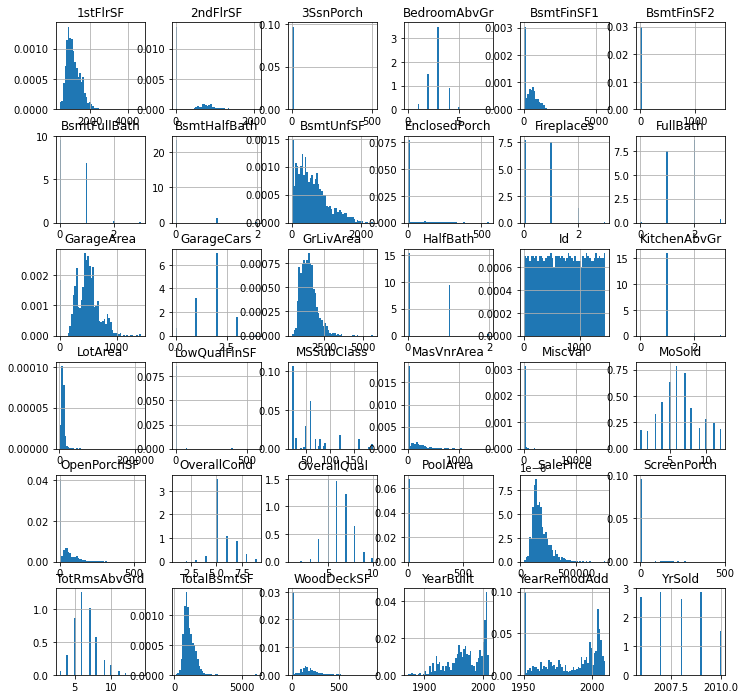

In [25]:
#Check the distribution of numerical variables after cca
data_cca.hist(bins=50, density=True, figsize=(12,12))
plt.show()

/home/munjal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


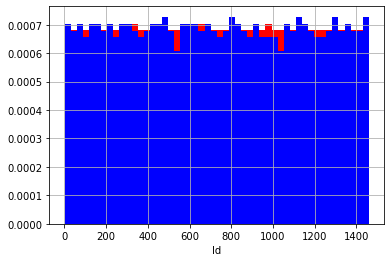

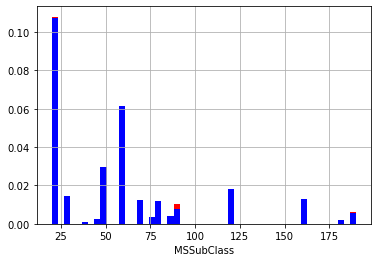

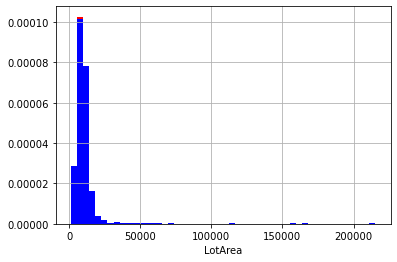

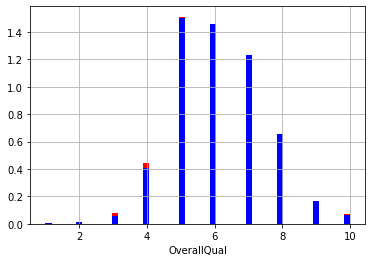

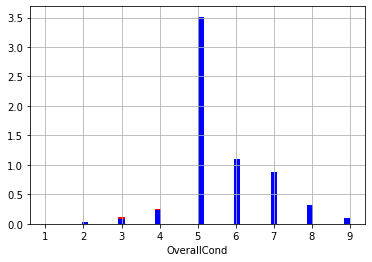

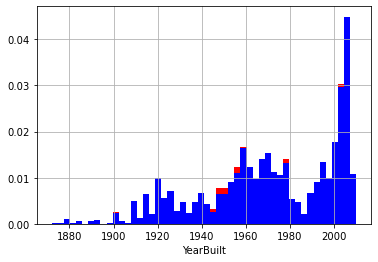

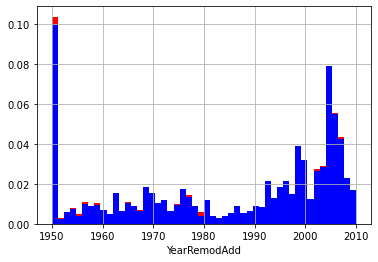

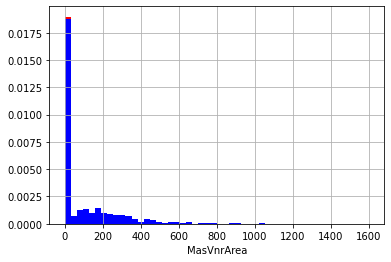

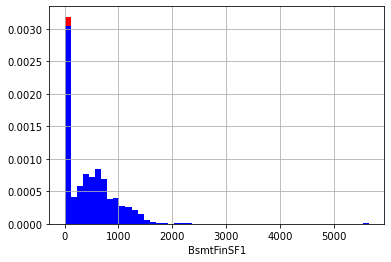

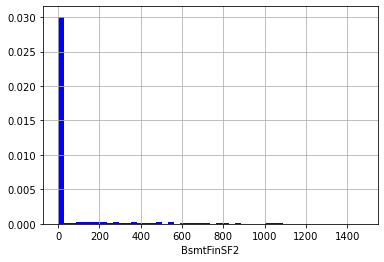

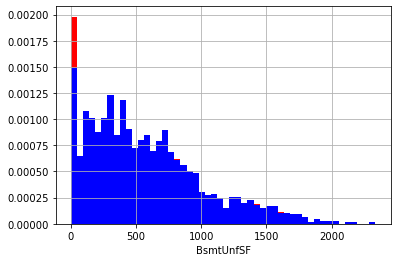

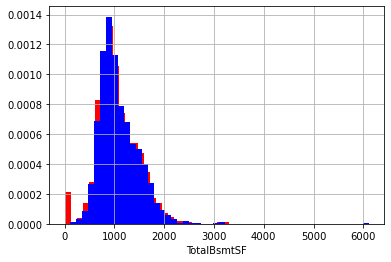

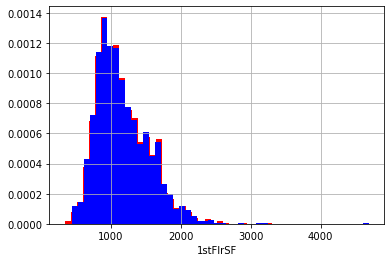

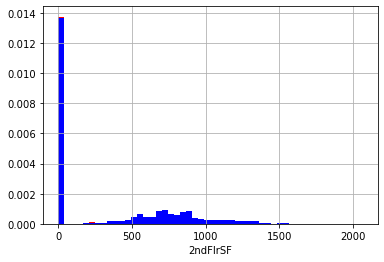

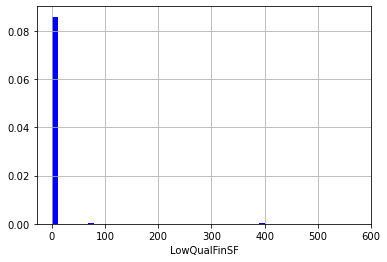

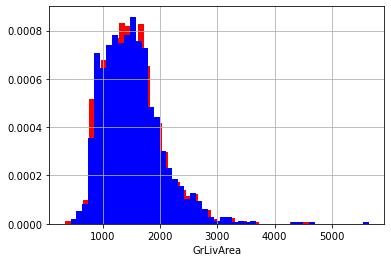

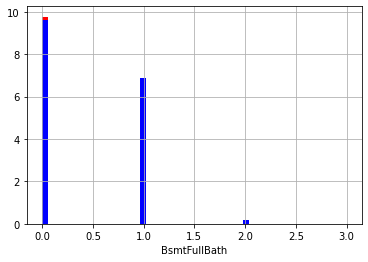

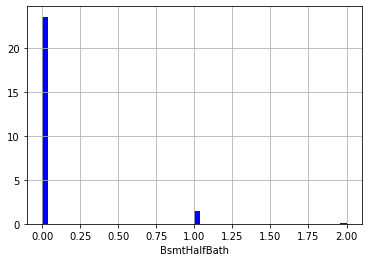

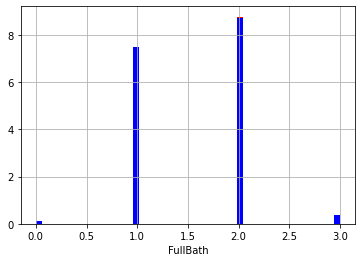

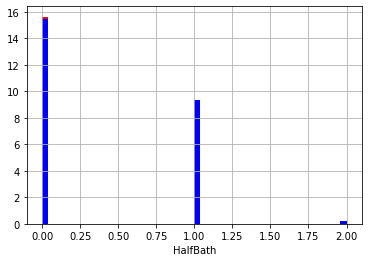

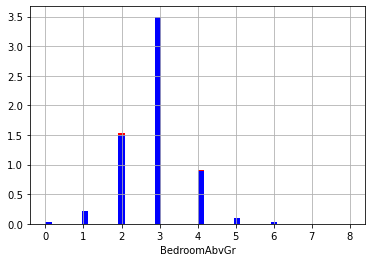

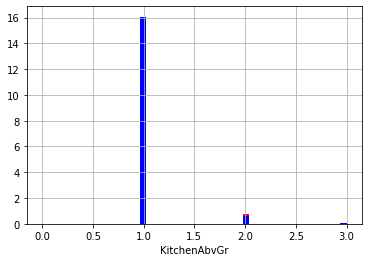

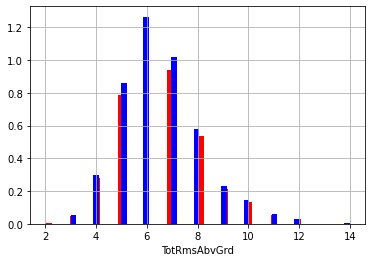

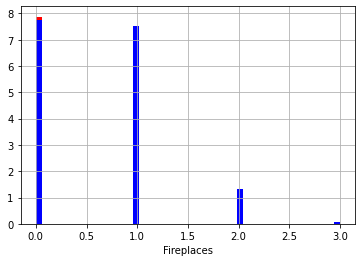

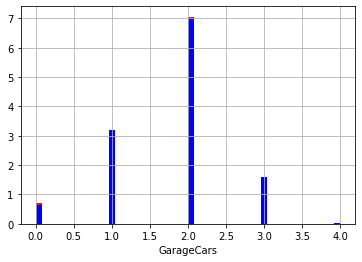

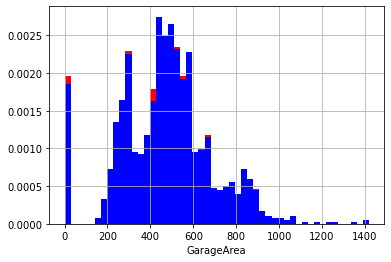

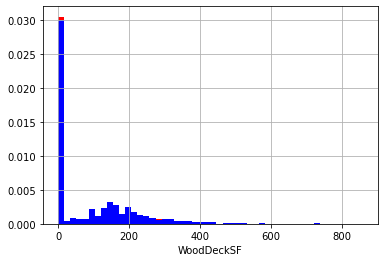

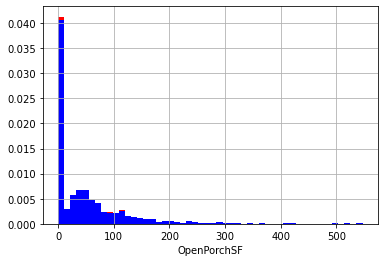

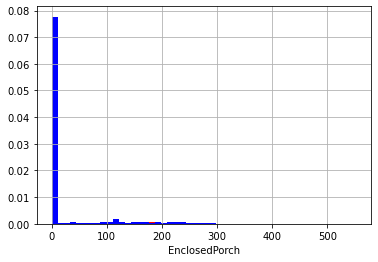

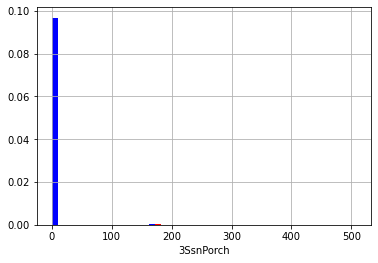

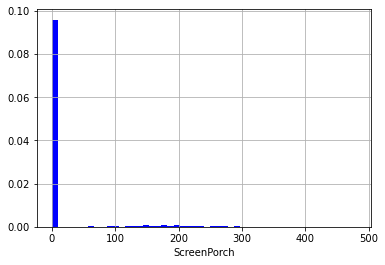

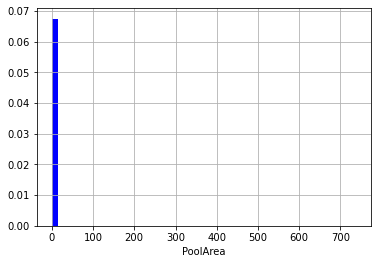

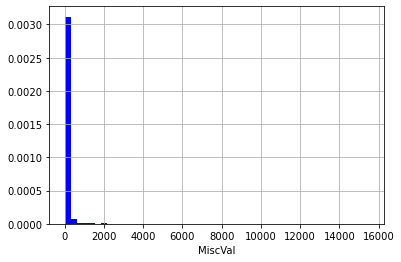

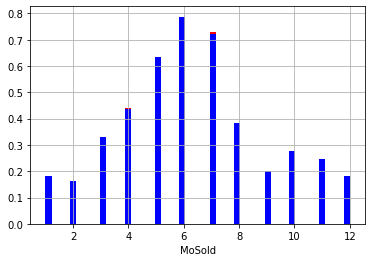

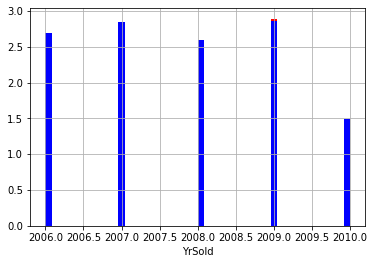

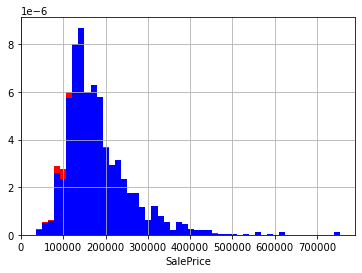

In [44]:
#Verify the distribution of variables before and after CCA is same or not
#NOTE: In case of MCAR (Missing Completely At Random) distribution should be preserved before and after CCA

def plot_dis(col_name, df_orig, df_cca):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    #original data
    df_orig[col_name].hist(bins=50, ax=ax,density=True, color='red')
    
    #after cca
    df_cca[col_name].hist(bins=50, ax=ax, density=True, color='blue')
    
    plt.xlabel(col_name)

cols_numerical = [var for var in data_cca.columns if data_cca[var].dtype != object]
for col in cols_numerical:
    plot_dis(col, data, data_cca)

From the above analysis we can conclude that for all numeric variables, distribution is almost preserved and hence it is safe to do CCA

In [54]:
#Verify whether frequency of categorires before and after CCA is preseved or not
##NOTE: For MCAR it should be preserved

def categorical_freq(df_orig, df_cca, col_name):
    cat_freq = pd.concat(
            [
                #Original data frequency
                df_orig[col_name].value_counts()/len(df_orig), 
                
                #After CCA frequency
                df_cca[col_name].value_counts()/len(df_cca)
            ], 
            axis =1)
    cat_freq.columns = ['Original', 'After CCA']
    return cat_freq

    
    

In [61]:
from IPython.display import display
categorical_cols = [var for var in data_cca.columns if data_cca[var].dtype == object]
for col in categorical_cols:
    tmp = categorical_freq(data, data_cca, col)
    display(tmp)
    


,Original,After CCA
RL,0.788356,0.786827
RM,0.149315,0.151558
FV,0.044521,0.043909
RH,0.010959,0.010623
C (all),0.006849,0.007082


,Original,After CCA
Pave,0.99589,0.995751
Grvl,0.00411,0.004249


,Original,After CCA
Reg,0.633562,0.627479
IR1,0.331507,0.337110
IR2,0.028082,0.028329
IR3,0.006849,0.007082


,Original,After CCA
Lvl,0.897945,0.897309
Bnk,0.043151,0.043201
HLS,0.034247,0.035411
Low,0.024658,0.024079


,Original,After CCA
AllPub,0.999315,0.999292
NoSeWa,0.000685,0.000708


,Original,After CCA
Inside,0.720548,0.718839
Corner,0.180137,0.181303
CulDSac,0.064384,0.064448
FR2,0.032192,0.032578
FR3,0.002740,0.002833


,Original,After CCA
Gtl,0.946575,0.945467
Mod,0.044521,0.045326
Sev,0.008904,0.009207


,Original,After CCA
NAmes,0.154110,0.152266
CollgCr,0.102740,0.104816
OldTown,0.077397,0.078612
Edwards,0.068493,0.063031
Somerst,0.058904,0.058782
Gilbert,0.054110,0.054533
NridgHt,0.052740,0.053116
Sawyer,0.050685,0.050992
NWAmes,0.050000,0.051700
SawyerW,0.040411,0.038244


,Original,After CCA
Norm,0.863014,0.864023
Feedr,0.055479,0.053116
Artery,0.032877,0.033286
RRAn,0.017808,0.018414
PosN,0.013014,0.013456
RRAe,0.007534,0.007082
PosA,0.005479,0.005666
RRNn,0.003425,0.003541
RRNe,0.001370,0.001416


,Original,After CCA
Norm,0.989726,0.989377
Feedr,0.004110,0.004249
RRNn,0.001370,0.001416
PosN,0.001370,0.001416
Artery,0.001370,0.001416
PosA,0.000685,0.000708
RRAn,0.000685,0.000708
RRAe,0.000685,0.000708


,Original,After CCA
1Fam,0.835616,0.842068
TwnhsE,0.078082,0.080028
Duplex,0.035616,0.026912
Twnhs,0.029452,0.030453
2fmCon,0.021233,0.020538


,Original,After CCA
1Story,0.497260,0.490793
2Story,0.304795,0.309490
1.5Fin,0.105479,0.105524
SLvl,0.044521,0.045326
SFoyer,0.025342,0.025496
1.5Unf,0.009589,0.009915
2.5Unf,0.007534,0.007790
2.5Fin,0.005479,0.005666


,Original,After CCA
Gable,0.781507,0.781161
Hip,0.195890,0.196176
Flat,0.008904,0.008499
Gambrel,0.007534,0.007790
Mansard,0.004795,0.004958
Shed,0.001370,0.001416


,Original,After CCA
CompShg,0.982192,0.982295
Tar&Grv,0.007534,0.007082
WdShngl,0.004110,0.004249
WdShake,0.003425,0.003541
Roll,0.000685,0.000708
Metal,0.000685,0.000708
ClyTile,0.000685,0.000708
Membran,0.000685,0.000708


,Original,After CCA
VinylSd,0.352740,0.354816
HdBoard,0.152055,0.154391
MetalSd,0.150685,0.152266
Wd Sdng,0.141096,0.142351
Plywood,0.073973,0.072946
CemntBd,0.041781,0.041785
BrkFace,0.034247,0.031870
WdShing,0.017808,0.016997
Stucco,0.017123,0.016289
AsbShng,0.013699,0.012748


,Original,After CCA
VinylSd,0.345205,0.347734
MetalSd,0.146575,0.148017
HdBoard,0.141781,0.143768
Wd Sdng,0.134932,0.135269
Plywood,0.097260,0.095609
CmentBd,0.041096,0.041076
Wd Shng,0.026027,0.025496
Stucco,0.017808,0.017705
BrkFace,0.017123,0.016289
AsbShng,0.013699,0.013456


,Original,After CCA
None,0.591781,0.588527
BrkFace,0.304795,0.310198
Stone,0.087671,0.090652
BrkCmn,0.010274,0.010623


,Original,After CCA
TA,0.620548,0.616856
Gd,0.334247,0.338527
Ex,0.035616,0.036119
Fa,0.009589,0.008499


,Original,After CCA
TA,0.878082,0.877479
Gd,0.100000,0.102691
Fa,0.019178,0.016997
Ex,0.002055,0.002125
Po,0.000685,0.000708


,Original,After CCA
PConc,0.443151,0.448300
CBlock,0.434247,0.442635
BrkTil,0.100000,0.102691
Slab,0.016438,NaN
Stone,0.004110,0.004249
Wood,0.002055,0.002125


,Original,After CCA
TA,0.444521,0.458924
Gd,0.423288,0.431303
Ex,0.082877,0.084986
Fa,0.023973,0.024788


,Original,After CCA
TA,0.897945,0.921388
Gd,0.044521,0.045326
Fa,0.030822,0.031870
Po,0.001370,0.001416


,Original,After CCA
No,0.652740,0.668555
Av,0.151370,0.156516
Gd,0.091781,0.094193
Mn,0.078082,0.080737


,Original,After CCA
Unf,0.294521,0.301700
GLQ,0.286301,0.291785
ALQ,0.150685,0.155807
BLQ,0.101370,0.104816
Rec,0.091096,0.093484
LwQ,0.050685,0.052408


,Original,After CCA
Unf,0.860274,0.882436
Rec,0.036986,0.038244
LwQ,0.031507,0.032578
BLQ,0.022603,0.023371
ALQ,0.013014,0.013456
GLQ,0.009589,0.009915


,Original,After CCA
GasA,0.978082,0.981586
GasW,0.012329,0.012040
Grav,0.004795,0.004958
Wall,0.002740,NaN
OthW,0.001370,0.001416
Floor,0.000685,NaN


,Original,After CCA
Ex,0.507534,0.513456
TA,0.293151,0.289660
Gd,0.165068,0.165722
Fa,0.033562,0.030453
Po,0.000685,0.000708


,Original,After CCA
Y,0.934932,0.942635
N,0.065068,0.057365


,Original,After CCA
SBrkr,0.913699,0.920680
FuseA,0.064384,0.062323
FuseF,0.018493,0.014873
FuseP,0.002055,0.001416
Mix,0.000685,0.000708


,Original,After CCA
TA,0.503425,0.499292
Gd,0.401370,0.405807
Ex,0.068493,0.070113
Fa,0.026712,0.024788


,Original,After CCA
Typ,0.931507,0.936261
Min2,0.023288,0.021955
Min1,0.021233,0.019830
Mod,0.010274,0.008499
Maj1,0.009589,0.009207
Maj2,0.003425,0.003541
Sev,0.000685,0.000708


,Original,After CCA
Y,0.917808,0.922805
N,0.061644,0.056657
P,0.020548,0.020538


,Original,After CCA
WD,0.867808,0.866856
New,0.083562,0.084278
COD,0.029452,0.029745
ConLD,0.006164,0.005666
ConLI,0.003425,0.003541
ConLw,0.003425,0.003541
CWD,0.002740,0.002833
Oth,0.002055,0.002125
Con,0.001370,0.001416


,Original,After CCA
Normal,0.820548,0.820822
Partial,0.085616,0.086402
Abnorml,0.069178,0.070822
Family,0.013699,0.014164
Alloca,0.008219,0.005666
AdjLand,0.002740,0.002125


From the above analysis we can observe that for all the categorical variables, frequency is same before and after CCA